In [52]:
!pip install spacy --quiet

In [53]:
!pip install pandas --quiet

In [54]:
import pandas as pd
import seaborn as sns
import nltk
import spacy
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")
from collections import Counter

from nltk.stem import *
from nltk.tokenize import word_tokenize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 95.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Named entity recognition is an information extraction method in which entities that are present in the text are classified into predefined entity types like “Person”,” Place”,” Organization”, etc.

We will use SpaCy which is an open-source library for advanced natural language processing tasks.

In [55]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

In [56]:
df_interim_p = pd.read_csv('../data/interim/Putin_tweets.csv')

In [57]:
df_interim_p['Clean_Tweet'] = df_interim_p['Clean_Tweet'].apply(lemmatize_words)

In [58]:
df_interim_p

,Timestamp,UserName,Comments,Likes,Retweets,Is_response,Quote_another,Tweet,Clean_Tweet,Top_tweet
0,2022-01-01,@FreeSyrianMemes,0,3,35,0,0,Halt Russian aggression with 2-day shipping on...,halt russian aggression day ship atgms syrian ...,0
1,2022-01-01,@_ciciulena,1,2,38,0,0,PUTIN?????????? #CIAO2021\n1\n2\n38,putin ciao,0
2,2022-01-01,@lonestarmoocher,10,10,56,0,0,Looks like Lumpy had a meeting with Putin.\n10...,look like lumpy meet putin,0
3,2022-01-01,@TomLondon6,9,218,813,0,0,"What kind of country honours war criminals, li...",kind country honour war criminal like blair im...,1
4,2022-01-01,@ukemonde,0,7,16,0,1,Time for a putin tribunal!!\nQuote Tweet\nMich...,time putin tribunal,0
...,...,...,...,...,...,...,...,...,...,...
10731,2022-07-16,@RoCoGB,2,10,11,0,1,Polite Reminder - asking on behalf of WILMA’s ...,polite reminder ask behalf wilma dog tx pledge...,0
10732,2022-07-16,@StefanK1117,2,22,36,0,1,@JoshShapiroPA\n’s opponent Mastriano is a Chr...,opponent mastriano christian nationalist pay c...,0
10733,2022-07-16,@SarcasmStardust,2,17,23,1,0,Replying to \n@leandri_olivia\n and \n@TRUMANH...,hear whale must true freethewizard freeassange...,0
10734,2022-07-16,@TheSigmaMaleDoc,1,9,14,0,1,Education system of india #neetug2022\nQuote T...,education system india neetug,0


In [59]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

In [60]:
ent=df_interim_p['Clean_Tweet'].\
apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]
counter=Counter(ent)
count=counter.most_common()


* PERSON: People including fictional
* NORP:Nationalities, religious and political groups
* GPE: companies, institutions, etc

<AxesSubplot:>

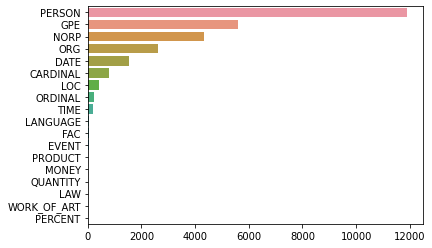

In [61]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

In [62]:
def ner(text,ent):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

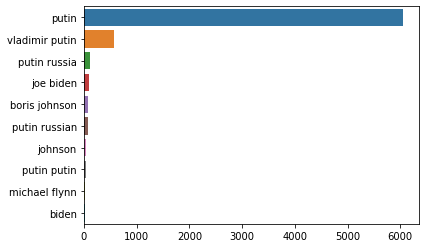

In [63]:
person=df_interim_p['Clean_Tweet'].apply(lambda x: ner(x, ent = 'PERSON'))
person=[i for x in person for i in x]
counter=Counter(person)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

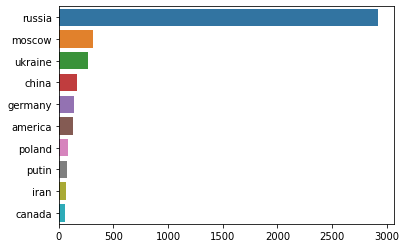

In [64]:
gpe=df_interim_p['Clean_Tweet'].apply(lambda x: ner(x, ent = 'GPE'))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

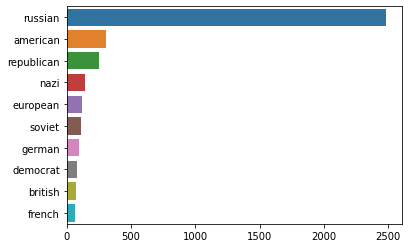

In [65]:
norp=df_interim_p['Clean_Tweet'].apply(lambda x: ner(x, ent = 'NORP'))
norp=[i for x in norp for i in x]
counter=Counter(norp)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)